In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score



In [4]:
# Read the 'merged_df_train_4.pkl' pickle file and load it into the 'train' DataFrame
merged_df_train_4 = pd.read_pickle('merged_df_train_MAE.pkl')
df_train = pd.DataFrame(merged_df_train_4)

# Read the 'test_3.pkl' pickle file and load it into the 'test' DataFrame
merged_df_test_4 = pd.read_pickle('merged_df_test_MAE.pkl')
df_test = pd.DataFrame(merged_df_test_4)

In [3]:
merged_df_train_4

,V264,addr2_target_encoded,V283,C1,C5,R_emaildomain_bin_google,M4_nan,V30,V156,D3,...,card6_debit,V142,V47,V80,TransactionAmt_decimal,P_emaildomain_suffix_us,D15,isFraud,isFraud_xgb,isFraud_xgb_proba
TransactionID,,,,,,,,,,,,,,,,,,,,,
2987000,NaN,0.024207,1.0,1.0,0.0,0,0,0.0,NaN,13.0,...,0,NaN,NaN,0.0,500,0,0.0,0,0,0.049274
2987001,NaN,0.024207,1.0,1.0,0.0,0,0,0.0,NaN,NaN,...,0,NaN,1.0,0.0,0,0,0.0,0,0,0.109343
2987002,NaN,0.024207,1.0,1.0,0.0,0,0,0.0,NaN,NaN,...,1,NaN,1.0,0.0,0,0,315.0,0,0,0.085206
2987003,NaN,0.024207,0.0,2.0,0.0,0,0,0.0,NaN,0.0,...,1,NaN,1.0,0.0,0,0,111.0,0,0,0.087324
2987004,0.0,0.024207,1.0,1.0,0.0,0,1,NaN,0.0,NaN,...,0,0.0,NaN,NaN,0,0,NaN,0,0,0.017489
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3429900,NaN,0.024207,0.0,3.0,1.0,0,1,1.0,NaN,96.0,...,1,NaN,1.0,0.0,950,0,348.0,0,0,0.090004
3429901,0.0,NaN,1.0,1.0,0.0,0,0,NaN,NaN,NaN,...,1,NaN,NaN,NaN,658,0,NaN,0,0,0.104147
3429902,NaN,0.024207,0.0,83.0,126.0,0,1,4.0,NaN,4.0,...,1,NaN,NaN,0.0,949,0,138.0,0,0,0.000944


In [4]:
merged_df_test_4

,V264,addr2_target_encoded,V283,C1,C5,R_emaildomain_bin_google,M4_nan,V30,V156,D3,...,card6_debit,V142,V47,V80,TransactionAmt_decimal,P_emaildomain_suffix_us,D15,isFraud,isFraud_xgb,isFraud_xgb_proba
TransactionID,,,,,,,,,,,,,,,,,,,,,
3429905,NaN,0.024207,1.0,1.0,1.0,0,1,0.0,NaN,NaN,...,1,NaN,NaN,NaN,949,0,NaN,0,0,0.037110
3429906,NaN,0.024207,0.0,2.0,1.0,0,1,1.0,NaN,362.0,...,1,NaN,NaN,NaN,950,1,NaN,0,0,0.000338
3429907,NaN,0.024207,0.0,161.0,95.0,0,0,1.0,NaN,15.0,...,1,NaN,1.0,0.0,0,0,559.0,0,0,0.158281
3429908,NaN,0.024207,0.0,3.0,0.0,0,0,0.0,NaN,0.0,...,1,NaN,1.0,0.0,0,0,163.0,0,0,0.042975
3429909,0.0,0.024207,1.0,2.0,0.0,1,1,NaN,1.0,NaN,...,0,0.0,1.0,1.0,0,0,57.0,0,0,0.081691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3577535,NaN,0.024207,1.0,2.0,1.0,0,0,1.0,NaN,30.0,...,1,NaN,NaN,0.0,0,0,56.0,0,0,0.034622
3577536,NaN,0.024207,1.0,1.0,0.0,0,0,0.0,NaN,NaN,...,1,NaN,1.0,0.0,500,0,0.0,0,0,0.054485
3577537,NaN,0.024207,1.0,1.0,1.0,0,1,1.0,NaN,NaN,...,1,NaN,1.0,0.0,949,0,0.0,0,0,0.019719


[[422402   4940]
 [  5126  10437]]


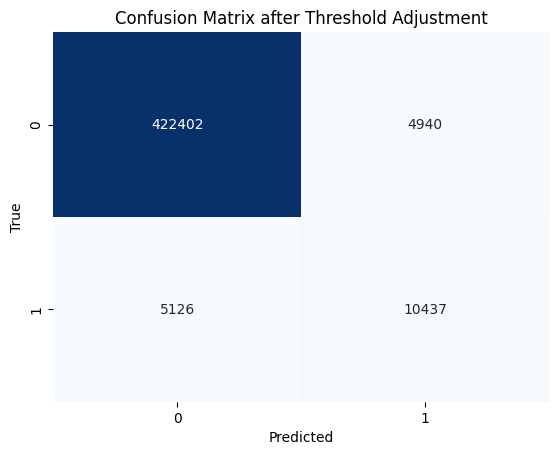

In [55]:
# Compare the predicted labels from a model with the true labels
# Parameter true values and predicted values
confusion = confusion_matrix(df_train['isFraud'], df_train['isFraud_xgb'])
print(confusion)
# Confusion Matrix
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix after Threshold Adjustment')
plt.show()


TRAIN

Threshold: 0, TPR: 1.0, FPR: 1.0
Threshold: 0.1, TPR: 0.9306688941720748, FPR: 0.18329347454731806
Threshold: 0.2, TPR: 0.8527276232088928, FPR: 0.0741116014807812
Threshold: 0.3, TPR: 0.788986699222515, FPR: 0.03752263994645975
Threshold: 0.4, TPR: 0.7316070166420356, FPR: 0.02072578871255341
Threshold: 0.5, TPR: 0.6706290560945833, FPR: 0.011559827959807367
Threshold: 0.6, TPR: 0.6124140589860567, FPR: 0.006423426669973932
Threshold: 0.7, TPR: 0.5492514296729423, FPR: 0.00352176944929354
Threshold: 0.8, TPR: 0.47908500931696973, FPR: 0.001829916085945215
Threshold: 0.9, TPR: 0.38308809355522716, FPR: 0.0007324344436072279


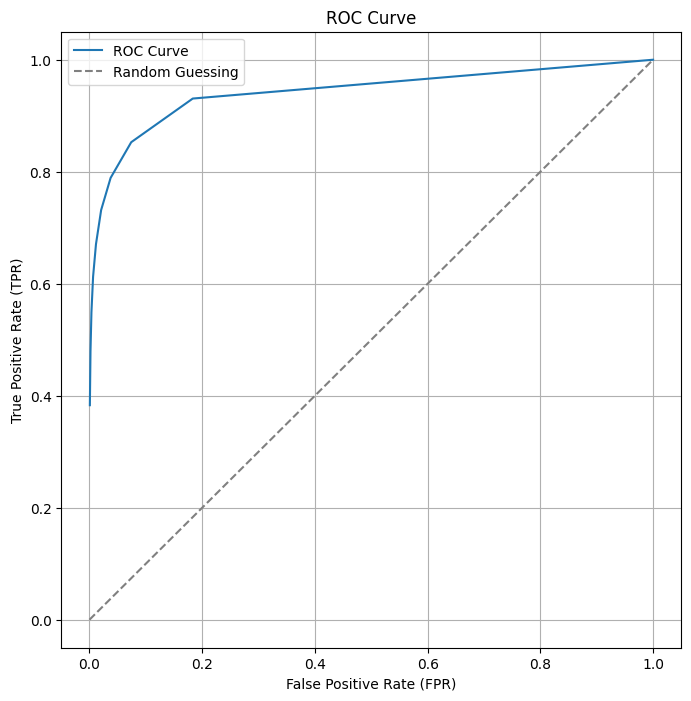

In [53]:
conf_matrix = np.array(confusion)

# Thresholds
thresholds = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

# Initialize lists to store TPR and FPR for each threshold
tpr_list = []
fpr_list = []

for threshold in thresholds:
    # You would replace this part with your actual model predictions
    predicted_positive = (df_train['isFraud_xgb_proba'] >= threshold).astype(int)

    # Confusion matrix for the current threshold
    conf_matrix_threshold = confusion_matrix(df_train['isFraud'], predicted_positive)

    # Calculate True Positive Rate and False Positive Rate for the current threshold
    TPR = conf_matrix_threshold[1, 1] / (conf_matrix_threshold[1, 1] + conf_matrix_threshold[1, 0])
    FPR = conf_matrix_threshold[0, 1] / (conf_matrix_threshold[0, 0] + conf_matrix_threshold[0, 1])

    # Append TPR and FPR to the lists
    tpr_list.append(TPR)
    fpr_list.append(FPR)

# Print the results
for i, threshold in enumerate(thresholds):
    print(f"Threshold: {threshold}, TPR: {tpr_list[i]}, FPR: {fpr_list[i]}")

# Plot TPR vs. FPR
tpr_list = np.array(tpr_list)
fpr_list = np.array(fpr_list)

optimal_threshold_index = np.argmax(tpr_list - fpr_list)
optimal_threshold = thresholds[optimal_threshold_index]

# Plot TPR vs. FPR
plt.figure(figsize=(8, 8))
plt.plot(fpr_list, tpr_list, label='ROC Curve')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guessing')

# Labeling and customization
plt.title('ROC Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend()
plt.grid(True)
plt.show()




Find the index of the threshold where the ROC curve is closest to the upper left corner (0, 1), 
which is considered an optimal point for a binary classification model. 

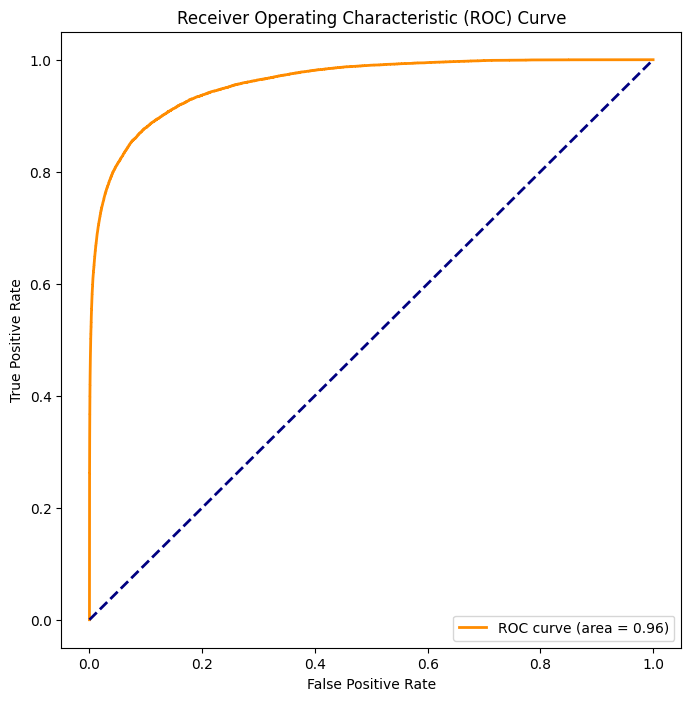

optimal_threshold_index:  13047
Optimal Threshold: 0.17607044
AUC Score: 0.8900

              precision    recall  f1-score   support

           0       0.99      0.91      0.95    427342
           1       0.26      0.87      0.40     15563

    accuracy                           0.91    442905
   macro avg       0.63      0.89      0.68    442905
weighted avg       0.97      0.91      0.93    442905

[[0.91073426 0.08926574]
 [0.1306946  0.8693054 ]]
[[389195  38147]
 [  2034  13529]]


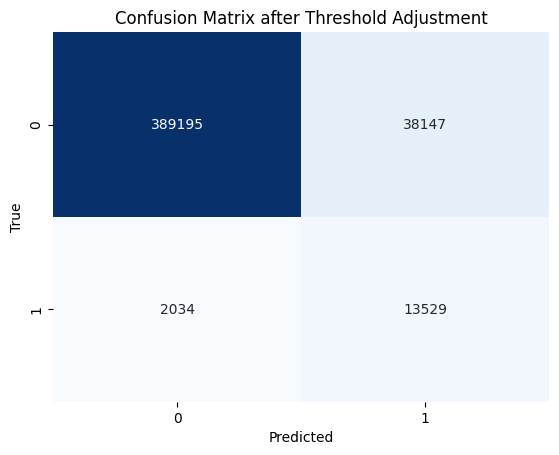

In [57]:
# 'isFraud' is the column with actual labels
# 'isFraud_xgb_proba' is the column with predicted probabilities

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(df_train['isFraud'], df_train['isFraud_xgb_proba'])

# Calculate AUC-ROC
roc_auc = roc_auc_score(df_train['isFraud'], df_train['isFraud_xgb_proba'])

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Find the optimal threshold
# np.argmax() -  returns the index of the maximum value in an array
# find the index of the threshold where the ROC curve is closest to the upper left corner (0, 1), which is considered an optimal point for a binary classification model. 
optimal_threshold_index = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_threshold_index]
print("optimal_threshold_index: ", optimal_threshold_index)
# This threshold is chosen as the optimal threshold for making predictions based on the ROC curve analysis
print('Optimal Threshold:', optimal_threshold)

df_train['isFraud_xgb_adjusted'] = (df_train['isFraud_xgb_proba'] >= optimal_threshold).astype(int)

# Calculate AUC directly using roc_auc_score
auc_score = roc_auc_score(df_train['isFraud'], df_train['isFraud_xgb_adjusted'])
print(f'AUC Score: {auc_score:.4f}')
print()
#classification report
print(classification_report(df_train['isFraud'], df_train['isFraud_xgb_adjusted']))

#confusion matrix
print(confusion_matrix(df_train['isFraud'], df_train['isFraud_xgb_adjusted'], normalize='true'))

confusion = confusion_matrix(df_train['isFraud'], df_train['isFraud_xgb_adjusted'])
print(confusion)
# Confusion Matrix
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix after Threshold Adjustment')
plt.show()


Calculate True Positive Rate and False Positive Rate for each threshold

TEST

In [54]:
# 'isFraud_xgb' is the column with original binary predictions
# 'isFraud_xgb_proba' is the column with predicted probabilities

# Adjust the classification threshold
adjusted_threshold = 0.17607044
df_test['isFraud_xgb_adjusted'] = (df_test['isFraud_xgb_proba'] >= adjusted_threshold).astype(int)


print("Threshold: ", adjusted_threshold)
# Calculate AUC directly using roc_auc_score
auc_score = roc_auc_score(df_test['isFraud'], df_test['isFraud_xgb_adjusted'])
print(f'AUC Score: {auc_score:.4f}')
print()
#classification report
print(classification_report(df_test['isFraud'], df_test['isFraud_xgb_adjusted']))

#confusion matrix
print(confusion_matrix(df_test['isFraud'], df_test['isFraud_xgb_adjusted'], normalize='true'))





Threshold:  0.17607044
AUC Score: 0.7928

              precision    recall  f1-score   support

           0       0.99      0.91      0.95    142535
           1       0.21      0.68      0.32      5100

    accuracy                           0.90    147635
   macro avg       0.60      0.79      0.63    147635
weighted avg       0.96      0.90      0.92    147635

[[0.90778405 0.09221595]
 [0.32215686 0.67784314]]
